<a href="https://colab.research.google.com/github/BernasconiLorenzo06/Geopandas/blob/main/GEO_PANDAS_%3D_ESERCIZIO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#carico i file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 73.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt


In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Bernasconi Lorenzo - ds964_nil_wm.zip")
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [ ]:
quartieri[quartieri["NIL"] == "BRUZZANO"].plot()

In [ ]:
#trovare il crs del dataset
quartieri.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#2
quartieri.head()

In [ ]:
#3
quartieri.sort_values(by="NIL")[["NIL"]]

In [ ]:
!pip install contextily
import contextily

In [ ]:
quartieri3857 = quartieri.to_crs(epsg=3857)
quartieri3857

In [ ]:
#4
ax = quartieri3857.plot(edgecolor =  "k", facecolor = "None",figsize=(12,6))
contextily.add_basemap(ax)

# ESERCIZIO IN PIU SUL GALVANI

In [ ]:
#trovare il quartiere dove c'è il galvani e lo trasformiamo in qualcosa di geografico
Galvani = Point(9.1907663,45.5065951)
quartieri[quartieri.contains(Galvani)]

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
30,14,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,10628.640923,4.246805e+06,119,"POLYGON ((9.21337 45.52948, 9.21337 45.52948, ..."


In [ ]:
#stampare il quartiere dove si trova il galvani

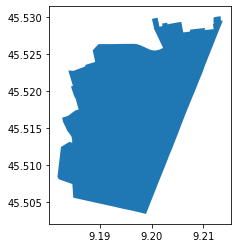

In [ ]:
quartieri[quartieri.contains(Galvani)].plot()
contextily.add_basemap(ax) 

In [ ]:
Quartiere_Galvani = quartieri[quartieri.contains(Galvani)]
#trasformiamo il quartiere del galvani in unaltro crs
Quartiere_Galvani3857 = Quartiere_Galvani.to_crs(epsg=3857)
Quartiere_Galvani3857

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
30,14,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,10628.640923,4.246805e+06,119,"POLYGON ((1025627.456 5705266.487, 1025627.453..."


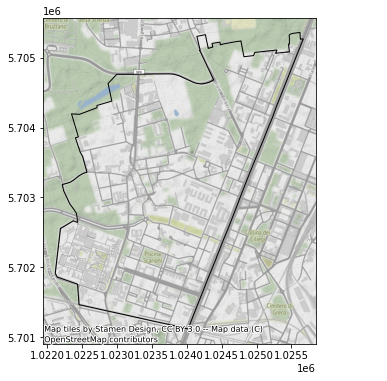

In [ ]:
ax = Quartiere_Galvani3857.plot(edgecolor =  "k", facecolor = "None",figsize=(12,6))
contextily.add_basemap(ax)

mettere dove sta il galvani nel quartiere, quindi piazzare il punto

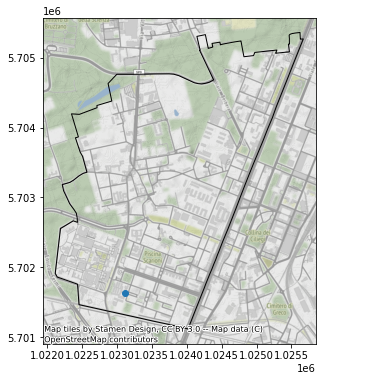

In [ ]:
#cambiare il crs del galvani
galvani = geopandas.GeoSeries([Point(9.1907663,45.5065951)],crs = 4326)   # trasformo il galvani in una cosa geografica
galvani3857 = galvani.to_crs(epsg = 3857)
ax = Quartiere_Galvani3857.plot(edgecolor =  "k", facecolor = "None",figsize=(12,6))
galvani3857.plot(ax=ax)
contextily.add_basemap(ax)

#ritorno con gli es

In [ ]:
#5
from shapely.geometry import Point
duomo_di_milano = Point(9.191383,45.464211)

In [ ]:
quartiere_duomo3857 = quartieri[quartieri.contains(duomo_di_milano)].to_crs(epsg=3857)
quartiere_duomo3857

In [ ]:
duomo = quartieri.loc[quartieri['NIL'] == 'DUOMO', 'geometry'].item()
duomo

In [ ]:
geopandas.GeoSeries([duomo,duomo_di_milano]).plot(cmap='tab10',figsize=(10,10))

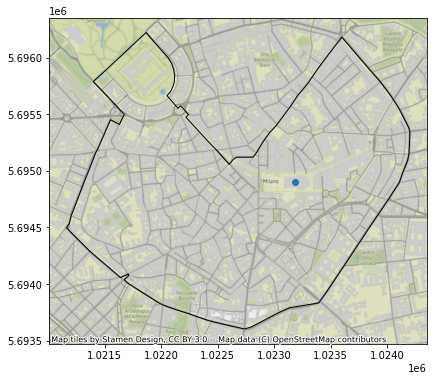

In [ ]:
duomo = geopandas.GeoSeries([Point(9.191383,45.464211)],crs = 4326)   # trasformo il duomo in una cosa geografica
duomo3857 = duomo.to_crs(epsg = 3857)
quartiere_duomo3857 = quartieri[quartieri.contains(duomo_di_milano)].to_crs(epsg=3857)
ax = quartiere_duomo3857.plot(edgecolor =  "k", facecolor = "None",figsize=(12,6))
duomo3857.plot(ax=ax)
contextily.add_basemap(ax)